<a href="https://colab.research.google.com/github/himanshutyagi2020/Tensorflow/blob/main/Copy_of_DecisionTree_Prolog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Library files
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import _tree
import graphviz

In [ ]:
# from google.colab import files
# uploaded = files.upload()

Saving engineering.csv to engineering (1).csv


In [ ]:
# Read files
df=pd.read_csv('engineering.csv')
#adding column names
df.columns =['party', 'smart', 'innovative', 'assignment','laptop','project','goal','happy']
df.head(10)

,party,smart,innovative,assignment,laptop,project,goal,happy
0,1,1,0,1,1,1,1,1
1,0,1,1,1,1,1,1,0
2,0,1,1,1,0,1,1,1
3,1,1,0,0,1,1,1,1
4,0,1,1,1,1,1,1,0
5,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1
7,1,0,1,0,0,1,0,0
8,1,1,1,0,1,1,0,1
9,0,1,0,1,0,0,0,0


In [ ]:
# SPlit the data into source and target data sets
Y = df['happy']
X = df.drop('happy', axis=1)

In [ ]:
# Apply the classifier model 
clf = DecisionTreeClassifier(criterion = "entropy",max_depth=15)
clf = clf.fit(X, Y)

In [ ]:
X_test = np.array([X.iloc[10]])
clf.predict(X_test)

array([0])

In [ ]:
# Text representation of the decision tree 
tree.export_text(clf, feature_names=list(X.columns))

'|--- party <= 0.50\n|   |--- goal <= 0.50\n|   |   |--- laptop <= 0.50\n|   |   |   |--- innovative <= 0.50\n|   |   |   |   |--- smart <= 0.50\n|   |   |   |   |   |--- project <= 0.50\n|   |   |   |   |   |   |--- assignment <= 0.50\n|   |   |   |   |   |   |   |--- class: 0\n|   |   |   |   |   |   |--- assignment >  0.50\n|   |   |   |   |   |   |   |--- class: 0\n|   |   |   |   |   |--- project >  0.50\n|   |   |   |   |   |   |--- assignment <= 0.50\n|   |   |   |   |   |   |   |--- class: 0\n|   |   |   |   |   |   |--- assignment >  0.50\n|   |   |   |   |   |   |   |--- class: 0\n|   |   |   |   |--- smart >  0.50\n|   |   |   |   |   |--- project <= 0.50\n|   |   |   |   |   |   |--- assignment <= 0.50\n|   |   |   |   |   |   |   |--- class: 0\n|   |   |   |   |   |   |--- assignment >  0.50\n|   |   |   |   |   |   |   |--- class: 0\n|   |   |   |   |   |--- project >  0.50\n|   |   |   |   |   |   |--- assignment <= 0.50\n|   |   |   |   |   |   |   |--- class: 0\n|   | 

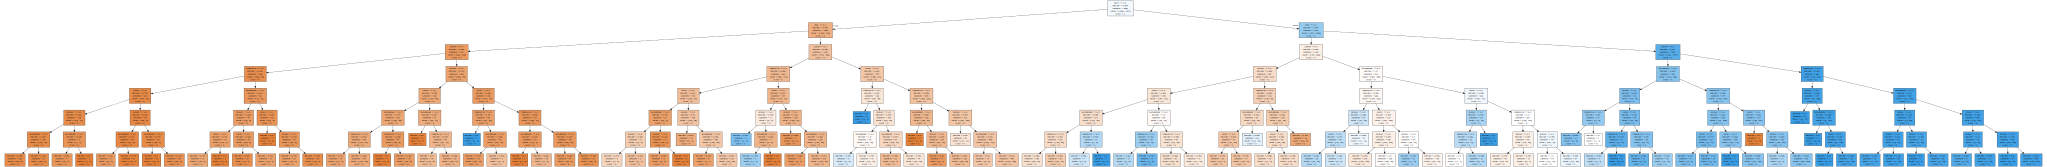

In [ ]:
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X.columns,  
                                class_names='happy',
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [ ]:
# from sklearn.externals.six import StringIO  
# from IPython.display import Image  
# from sklearn.tree import export_graphviz
# import pydotplus
# dot_data = StringIO()
# export_graphviz(clf, out_file=dot_data,  
#                     filled=True, rounded=True,
#                     special_characters=True, feature_names = X.columns,class_names=['0','1'])
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('DT.png')
# Image(graph.create_png())

In [ ]:
# Convert Tree structure to Code as if-else statements

def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    feature_names = [f.replace(" ", "_")[:-5] for f in feature_names]
    print("def predict({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "    " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, np.round(threshold,2)))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, np.round(threshold,2)))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 1)

In [ ]:
# Tree representation to Code as If-else statements
tree_to_code(clf, feature_names=list(X.columns))

def predict(, , innov, assig, l, pr, ):
    if party <= 0.5:
        if goal <= 0.5:
            if laptop <= 0.5:
                if innovative <= 0.5:
                    if smart <= 0.5:
                        if project <= 0.5:
                            if assignment <= 0.5:
                                return [[95.  8.]]
                            else:  # if assignment > 0.5
                                return [[25.  2.]]
                        else:  # if project > 0.5
                            if assignment <= 0.5:
                                return [[6. 1.]]
                            else:  # if assignment > 0.5
                                return [[1. 0.]]
                    else:  # if smart > 0.5
                        if project <= 0.5:
                            if assignment <= 0.5:
                                return [[5. 1.]]
                            else:  # if assignment > 0.5
                                return [[36.  1.]]
         

In [ ]:
# get rules function to extract rules for prolog
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if "
        
        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " then "
        if class_names is None:
            rule += "response: "+str(np.round(path[-1][0][0][0],3))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),2)}%)"
        rule += f" | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules

In [ ]:
# Extract Rules from the classifier
rules = get_rules(clf, list(X.columns), ['0', '1'])
for r in rules:
    print(r)

if (party > 0.5) and (goal > 0.5) and (laptop > 0.5) and (innovative > 0.5) and (assignment > 0.5) and (smart > 0.5) and (project > 0.5) then class: 1 (proba: 96.13%) | based on 646 samples
if (party <= 0.5) and (goal > 0.5) and (laptop > 0.5) and (smart > 0.5) and (innovative > 0.5) and (project > 0.5) and (assignment > 0.5) then class: 0 (proba: 65.15%) | based on 482 samples
if (party > 0.5) and (goal > 0.5) and (laptop <= 0.5) and (assignment > 0.5) and (innovative > 0.5) and (smart > 0.5) and (project > 0.5) then class: 1 (proba: 72.13%) | based on 305 samples
if (party > 0.5) and (goal <= 0.5) and (laptop > 0.5) and (assignment <= 0.5) and (innovative > 0.5) and (smart <= 0.5) and (project <= 0.5) then class: 0 (proba: 55.04%) | based on 278 samples
if (party > 0.5) and (goal > 0.5) and (laptop <= 0.5) and (assignment > 0.5) and (innovative <= 0.5) and (project > 0.5) and (smart > 0.5) then class: 1 (proba: 71.73%) | based on 237 samples
if (party <= 0.5) and (goal > 0.5) and (la